In [2]:
import os
import sys
import importlib
import numpy as np
import pandas as pd
import scipy

sys.path.append(os.path.abspath('../src'))

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['mathtext.fontset'] = 'cm'

import utils
import preprocess

importlib.reload(utils)
importlib.reload(preprocess)

from utils import fetch_train_data, describe_data, evaluate_model, train_test_split, random_split_aggr
from preprocess import *

df = fetch_train_data(path='../data/train_data_all_filled.json')
df = Preprocessor().cleanse(df, is_train=True)

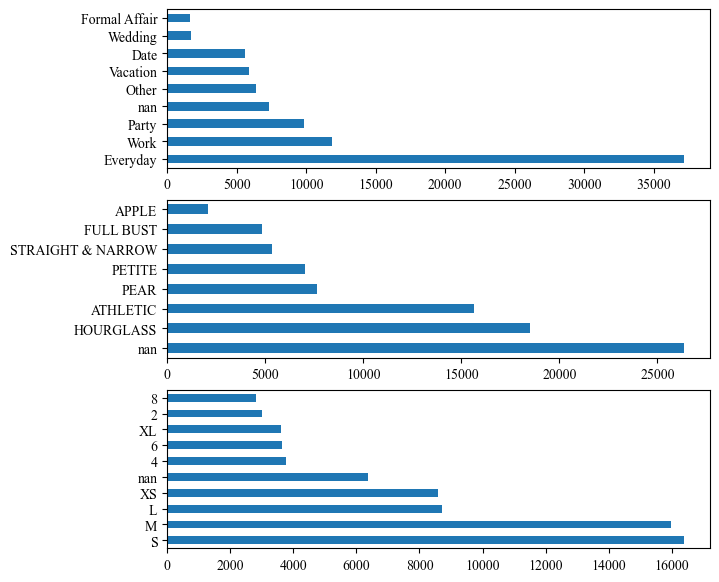

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(7, 7))
df.rented_for.value_counts(dropna=False).sort_values(
    ascending=False).head(10).plot(kind='barh', ax=ax[0])
df.body_type.value_counts(dropna=False).sort_values(
    ascending=False).head(10).plot(kind='barh', ax=ax[1])
df.size_main.value_counts(dropna=False).sort_values(
    ascending=False).head(10).plot(kind='barh', ax=ax[2])
fig.savefig('../report/figs/rented_body.svg', bbox_inches='tight')


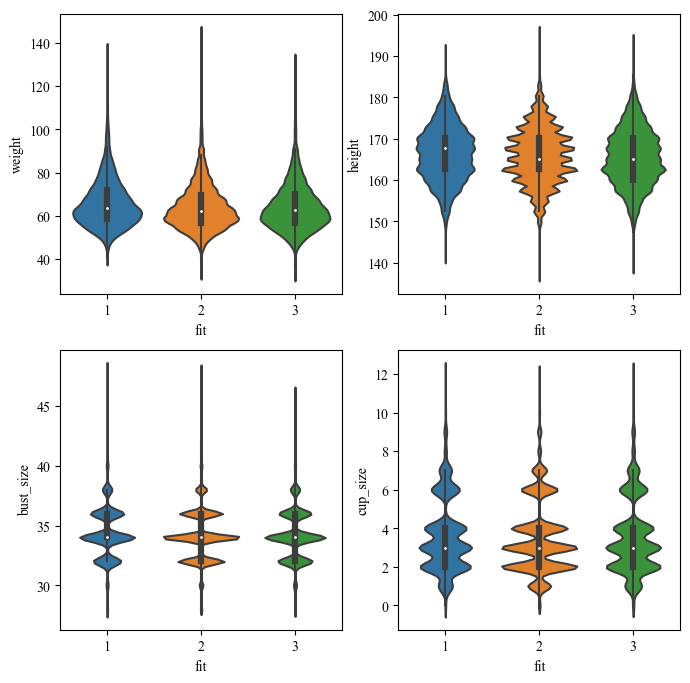

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
sns.violinplot(x='fit', y='weight', data=df, ax=ax[0, 0])
sns.violinplot(x='fit', y='height', data=df, ax=ax[0, 1])
sns.violinplot(x='fit', y='bust_size', data=df, ax=ax[1, 0])
# df.cup_size = df.cup_size.cat.codes
# df.cup_size = df.cup_size.replace({-1: np.nan})
sns.violinplot(x='fit', y='cup_size', data=df, ax=ax[1, 1])
fig.savefig('../report/figs/height_weight.svg', bbox_inches='tight')